# IMDB 리뷰 데이터에 대한 이해

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()
num_classes = len(set(y_train))

17473536/17464789 [==============================] - 1s 0us/step


In [3]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [4]:
print('첫번째 훈련용 리뷰 :',X_train[0])
print('첫번째 훈련용 리뷰의 레이블 :',y_train[0])

첫번째 훈련용 리뷰 : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
첫번째 훈련용 리뷰의 레이블 : 1


In [6]:
reviews_length = [len(review) for review in X_train]
reviews_length[:3]

[218, 189, 141]

In [7]:
print('리뷰의 최대 길이 : {}'.format(np.max(reviews_length)))
print('리뷰의 평균 길이 : {}'.format(np.mean(reviews_length)))

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


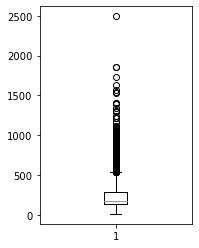

In [10]:
plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.show()

In [11]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)

In [12]:
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


In [13]:
word_to_index = imdb.get_word_index()
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

1654784/1641221 [==============================] - 0s 0us/step


In [14]:
print('빈도수 상위 1등 단어 : {}'.format(index_to_word[4]))
print('빈도수 상위 3938등 단어 : {}'.format(index_to_word[3941]))

빈도수 상위 1등 단어 : the
빈도수 상위 3938등 단어 : suited


In [15]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

In [16]:
print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

# GRU로 IMDB 리뷰 감성 분류하기

In [17]:
# 단어 집합의 크기를 10,000으로 제한하고, 리뷰 최대 길이는 500으로 제한하여 패딩
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [18]:
vocab_size = 10000
max_len = 500

In [19]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [20]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [21]:
X_train.shape, X_test.shape

((25000, 500), (25000, 500))

In [22]:
embedding_dim = 100
hidden_units = 128

In [23]:
## 모델 층 쌓기
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1000000   
                                                                 
 gru (GRU)                   (None, 128)               88320     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,088,449
Trainable params: 1,088,449
Non-trainable params: 0
_________________________________________________________________


In [25]:
## EarlyStop과 checkpoint 설정
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
cp = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [26]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=15, 
    callbacks=[es, cp], 
    batch_size=64, 
    validation_split=0.2
)

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.4904 - acc: 0.7756
Epoch 00001: val_acc improved from -inf to 0.85880, saving model to GRU_model.h5
313/313 [==============================] - 204s 643ms/step - loss: 0.4904 - acc: 0.7756 - val_loss: 0.3308 - val_acc: 0.8588
Epoch 2/15
 30/313 [=>............................] - ETA: 2:56 - loss: 0.3193 - acc: 0.8703

In [ ]:
# 모델 불러오기
loaded_model = load_model('GRU_model.h5')

In [ ]:
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))